In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [2]:
spotify=pd.read_csv("songsutf8.csv")
spotify.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

In [3]:
spotify.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
spotify.tail()

title            artist  \
598                Find U Again (feat. Camila Cabello)       Mark Ronson   
599      Cross Me (feat. Chance the Rapper & PnB Rock)        Ed Sheeran   
600  No Brainer (feat. Justin Bieber, Chance the Ra...         DJ Khaled   
601    Nothing Breaks Like a Heart (feat. Miley Cyrus)       Mark Ronson   
602                                   Kills You Slowly  The Chainsmokers   

      top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
598   dance pop  2019  104    66    61  -7    20   16  176      1     3   75  
599         pop  2019   95    79    75  -6     7   61  206     21    12   75  
600   dance pop  2019  136    76    53  -5     9   65  260      7    34   70  
601   dance pop  2019  114    79    60  -6    42   24  217      1     7   69  
602  electropop  2019  150    44    70  -9    13   23  213      6     6   67

In [5]:
spotify.describe().transpose()

count         mean        std     min     25%     50%     75%     max
year   603.0  2014.592040   2.607057  2010.0  2013.0  2015.0  2017.0  2019.0
bpm    603.0   118.545605  24.795358     0.0   100.0   120.0   129.0   206.0
nrgy   603.0    70.504146  16.310664     0.0    61.0    74.0    82.0    98.0
dnce   603.0    64.379768  13.378718     0.0    57.0    66.0    73.0    97.0
dB     603.0    -5.578773   2.798020   -60.0    -6.0    -5.0    -4.0    -2.0
live   603.0    17.774461  13.102543     0.0     9.0    12.0    24.0    74.0
val    603.0    52.225539  22.513020     0.0    35.0    52.0    69.0    98.0
dur    603.0   224.674959  34.130059   134.0   202.0   221.0   239.5   424.0
acous  603.0    14.326700  20.766165     0.0     2.0     6.0    17.0    99.0
spch   603.0     8.358209   7.483162     0.0     4.0     5.0     9.0    48.0
pop    603.0    66.520730  14.517746     0.0    60.0    69.0    76.0    99.0

In [6]:
spotify.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [7]:
spotify.corr()

year       bpm      nrgy      dnce        dB      live       val  \
year   1.000000 -0.104247 -0.225596  0.079269 -0.126471 -0.136331 -0.122025   
bpm   -0.104247  1.000000  0.126170 -0.131301  0.183870  0.081579  0.016021   
nrgy  -0.225596  0.126170  1.000000  0.167209  0.537528  0.186738  0.409577   
dnce   0.079269 -0.131301  0.167209  1.000000  0.233170 -0.028801  0.501696   
dB    -0.126471  0.183870  0.537528  0.233170  1.000000  0.081934  0.282922   
live  -0.136331  0.081579  0.186738 -0.028801  0.081934  1.000000  0.020226   
val   -0.122025  0.016021  0.409577  0.501696  0.282922  0.020226  1.000000   
dur   -0.215344 -0.029359 -0.143610 -0.176841 -0.104723  0.098339 -0.262256   
acous  0.101725 -0.113257 -0.562287 -0.240064 -0.190401 -0.098167 -0.249038   
spch   0.004778  0.058999  0.107313 -0.028041 -0.001110  0.144103  0.122013   
pop    0.241261  0.018983 -0.057645  0.116054  0.156897 -0.075749  0.038953   

            dur     acous      spch       pop  
year  -0.215344  0.101725  0.004778  0.241261  
bpm   -0.029359 -0.113257  0.058999  0.018983  
nrgy  -0.143610 -0.562287  0.107313 -0.057645  
dnce  -0.176841 -0.240064 -0.028041  0.116054  
dB    -0.104723 -0.190401 -0.001110  0.156897  
live   0.098339 -0.098167  0.144103 -0.075749  
val   -0.262256 -0.249038  0.122013  0.038953  
dur    1.000000  0.091802  0.054564 -0.104363  
acous  0.091802  1.000000  0.002763  0.026704  
spch   0.054564  0.002763  1.000000 -0.041490  
pop   -0.104363  0.026704 -0.041490  1.000000

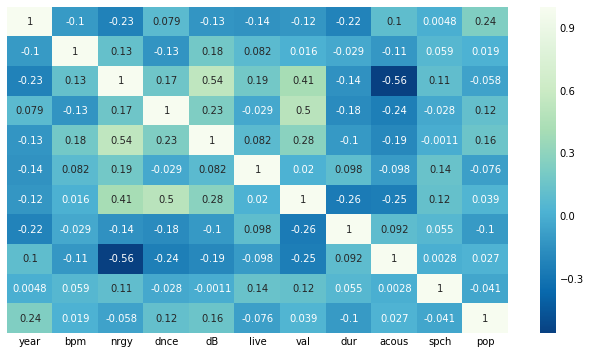

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(spotify.corr(),yticklabels=False,annot=True,cmap="GnBu_r")

<Figure size 720x432 with 0 Axes>

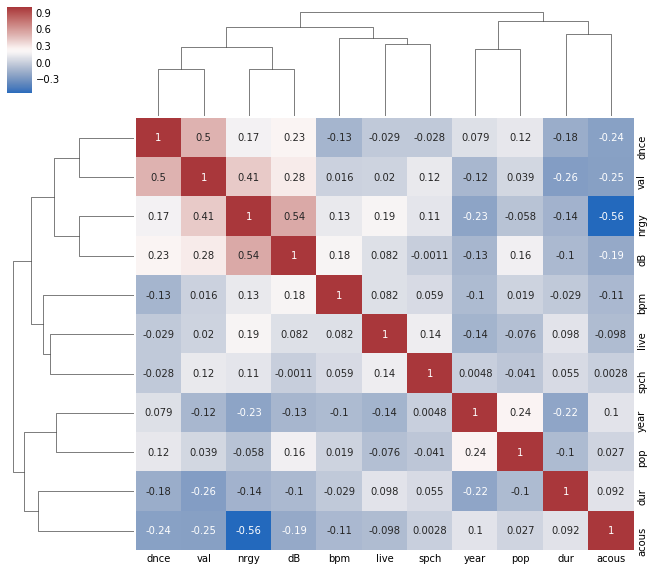

In [9]:
plt.figure(figsize=(10,6))
sns.clustermap(spotify.corr(),cmap="vlag",annot=True)

Text(0.5, 1.0, 'year vs popularity')

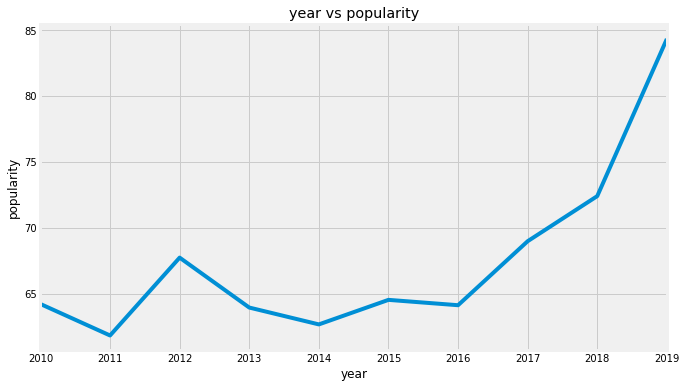

In [10]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["pop"].plot()
plt.xlabel("year")
plt.ylabel("popularity")
plt.title("year vs popularity")

Text(0.5, 1.0, 'year vs beats per minute')

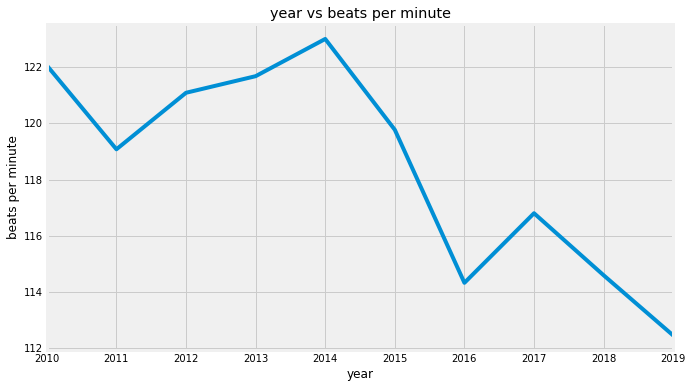

In [11]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["bpm"].plot()
plt.xlabel("year")
plt.ylabel("beats per minute")
plt.title("year vs beats per minute")

Text(0.5, 1.0, 'year vs energy')

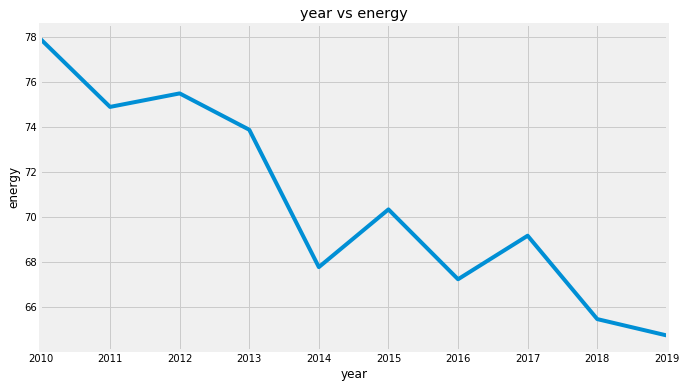

In [12]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["nrgy"].plot()
plt.xlabel("year")
plt.ylabel("energy")
plt.title("year vs energy")

Text(0.5, 1.0, 'year vs dance')

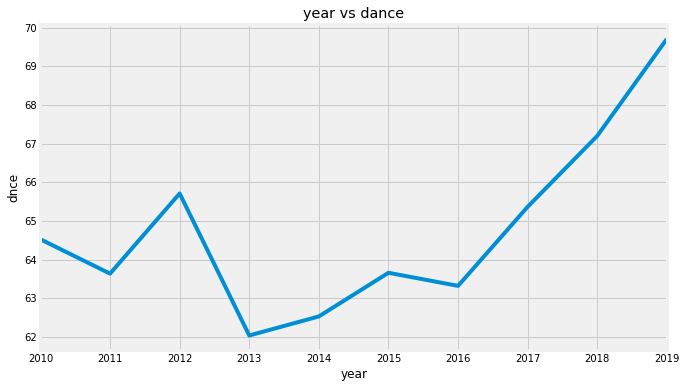

In [13]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["dnce"].plot()
plt.xlabel("year")
plt.ylabel("dnce")
plt.title("year vs dance")

Text(0.5, 1.0, 'year vs Loud ness')

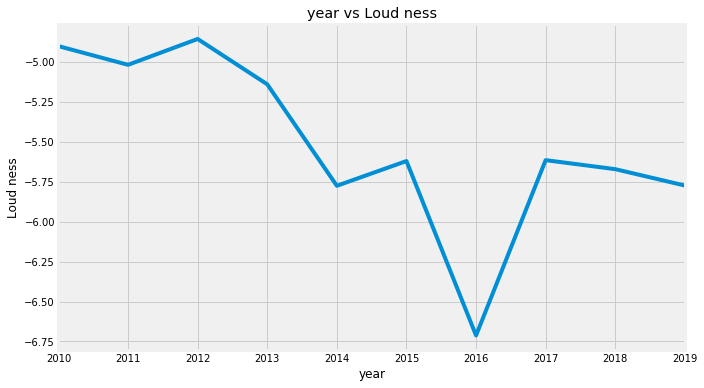

In [14]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["dB"].plot()
plt.xlabel("year")
plt.ylabel("Loud ness")
plt.title("year vs Loud ness")

Text(0.5, 1.0, 'year vs dur')

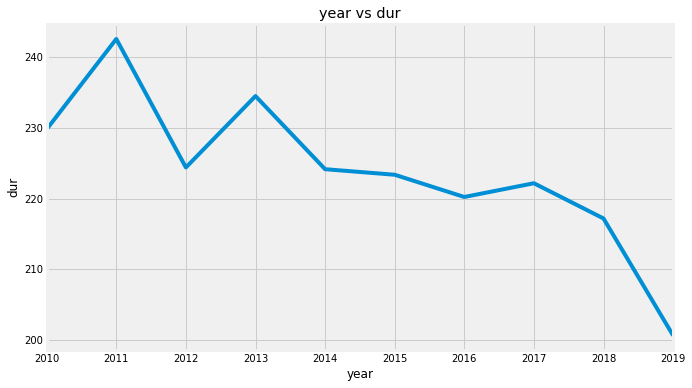

In [15]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["dur"].plot()
plt.xlabel("year")
plt.ylabel("dur")
plt.title("year vs dur")

Text(0.5, 1.0, 'year vs Acousticness')

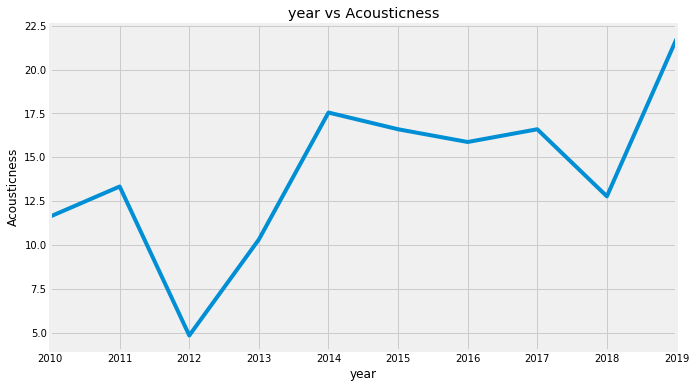

In [16]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["acous"].plot()
plt.xlabel("year")
plt.ylabel("Acousticness")
plt.title("year vs Acousticness")

Text(0.5, 1.0, 'year vs Speechiness')

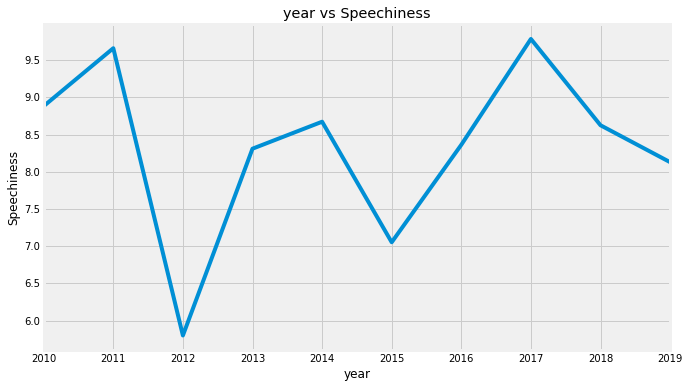

In [17]:
plt.figure(figsize=(10,6))
spotify.groupby("year").mean()["spch"].plot()
plt.xlabel("year")
plt.ylabel("Speechiness")
plt.title("year vs Speechiness")

In [18]:
spotify.sort_values("pop",ascending=False).head(10)

title         artist  \
572                                           Memories       Maroon 5   
573                                Lose You To Love Me   Selena Gomez   
574                                  Someone You Loved  Lewis Capaldi   
575                                           Señorita   Shawn Mendes   
576                                  How Do You Sleep?      Sam Smith   
578                             Trampoline (with ZAYN)          SHAED   
577  South of the Border (feat. Camila Cabello & Ca...     Ed Sheeran   
580                                        Truth Hurts          Lizzo   
581         Good as Hell (feat. Ariana Grande) - Remix          Lizzo   
579                                            Happier     Marshmello   

        top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
572           pop  2019   91    32    76  -7     8   57  189     84     5   99  
573     dance pop  2019  102    34    51  -9    21    9  206     58     4   97  
574           pop  2019  110    41    50  -6    11   45  182     75     3   96  
575  canadian pop  2019  117    54    76  -6     9   75  191      4     3   95  
576           pop  2019  111    68    48  -5     8   35  202     15     9   93  
578    electropop  2019  127    46    62  -6    14   50  184     56     3   92  
577           pop  2019   98    62    86  -6     9   67  204     15     8   92  
580   escape room  2019  158    62    72  -3    12   41  173     11    11   90  
581   escape room  2019   96    89    67  -3    74   48  159     30     6   90  
579       brostep  2019  100    79    69  -3    17   67  214     19     5   90

In [19]:
spotify.sort_values("pop",ascending=True).head(10)

title             artist       top genre  year  \
50                           Hello     Martin Solveig        big room  2010   
442              Million Years Ago              Adele    british soul  2016   
138        Blow Me (One Last Kiss)               P!nk       dance pop  2012   
362               L.A.LOVE (la la)             Fergie       dance pop  2015   
267                Not a Bad Thing  Justin Timberlake       dance pop  2014   
103  Muny - Album Version (Edited)        Nicki Minaj       dance pop  2011   
361                      Dangerous    Jennifer Hudson       dance pop  2015   
441               Behind Your Back      Nelly Furtado  canadian latin  2016   
102                       Firework         Katy Perry       dance pop  2011   
101   Last Friday Night (T.G.I.F.)         Katy Perry       dance pop  2011   

     bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
50   128    98    67  -3    10   45  191      1     3    0  
442    0     0     0 -60     0    0  227      0     0    0  
138  114    92    60  -3    25   75  256      0     4    0  
362  202    39    48  -8    26   27  193      2     9    0  
267   86    73    59  -6    38   46  266     27     6    0  
103   98    72    80  -5    19   53  227     56    33    7  
361  109    53    90  -5     8   65  255      0     5   18  
441   98    47    80 -10     7   69  228     25     4   18  
102  124    83    64  -5    11   65  228     14     5   25  
101  126    81    65  -4    67   72  231      0     4   27

In [20]:
spotify["artist"].value_counts()

Katy Perry                  17
Justin Bieber               16
Maroon 5                    15
Rihanna                     15
Lady Gaga                   14
Bruno Mars                  13
Ed Sheeran                  11
Pitbull                     11
Shawn Mendes                11
The Chainsmokers            11
Calvin Harris               10
Adele                       10
Jennifer Lopez              10
Ariana Grande                9
OneRepublic                  9
Kesha                        9
Justin Timberlake            9
Britney Spears               9
David Guetta                 9
Taylor Swift                 8
Demi Lovato                  8
Selena Gomez                 8
Beyoncé                      8
One Direction                7
DNCE                         7
Christina Aguilera           6
Meghan Trainor               6
Sia                          6
P!nk                         6
Alicia Keys                  6
                            ..
Jess Glynne                  1
Disclosu

In [21]:
spotify["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
hip pop                        6
complextro                     6
australian dance               6
australian pop                 5
atl hip hop                    5
edm                            5
hip hop                        4
latin                          4
permanent wave                 4
tropical house                 3
colombian pop                  3
canadian hip hop               2
candy pop                      2
brostep                        2
folk-pop                       2
downtempo                      2
indie pop                      2
electronic trap                2
baroque pop                    2
belgian ed

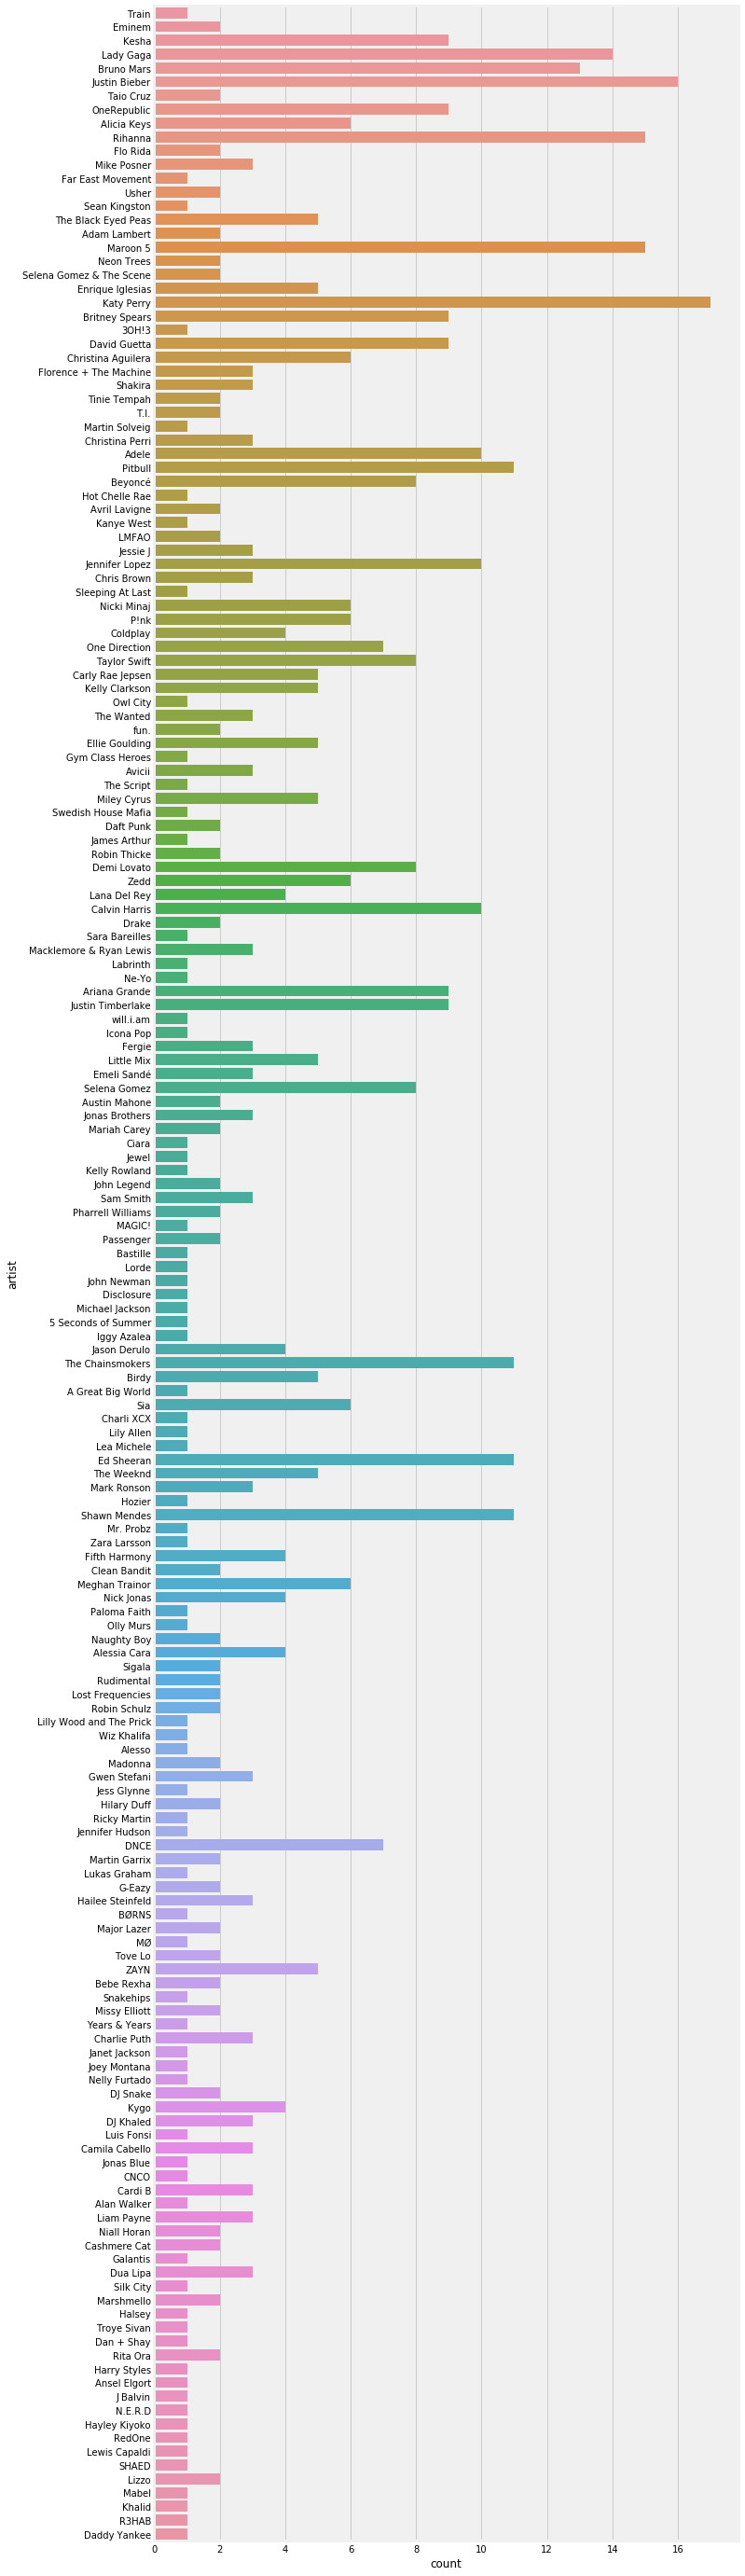

In [22]:
plt.figure(figsize=(10,50))
sns.countplot(y=spotify["artist"])

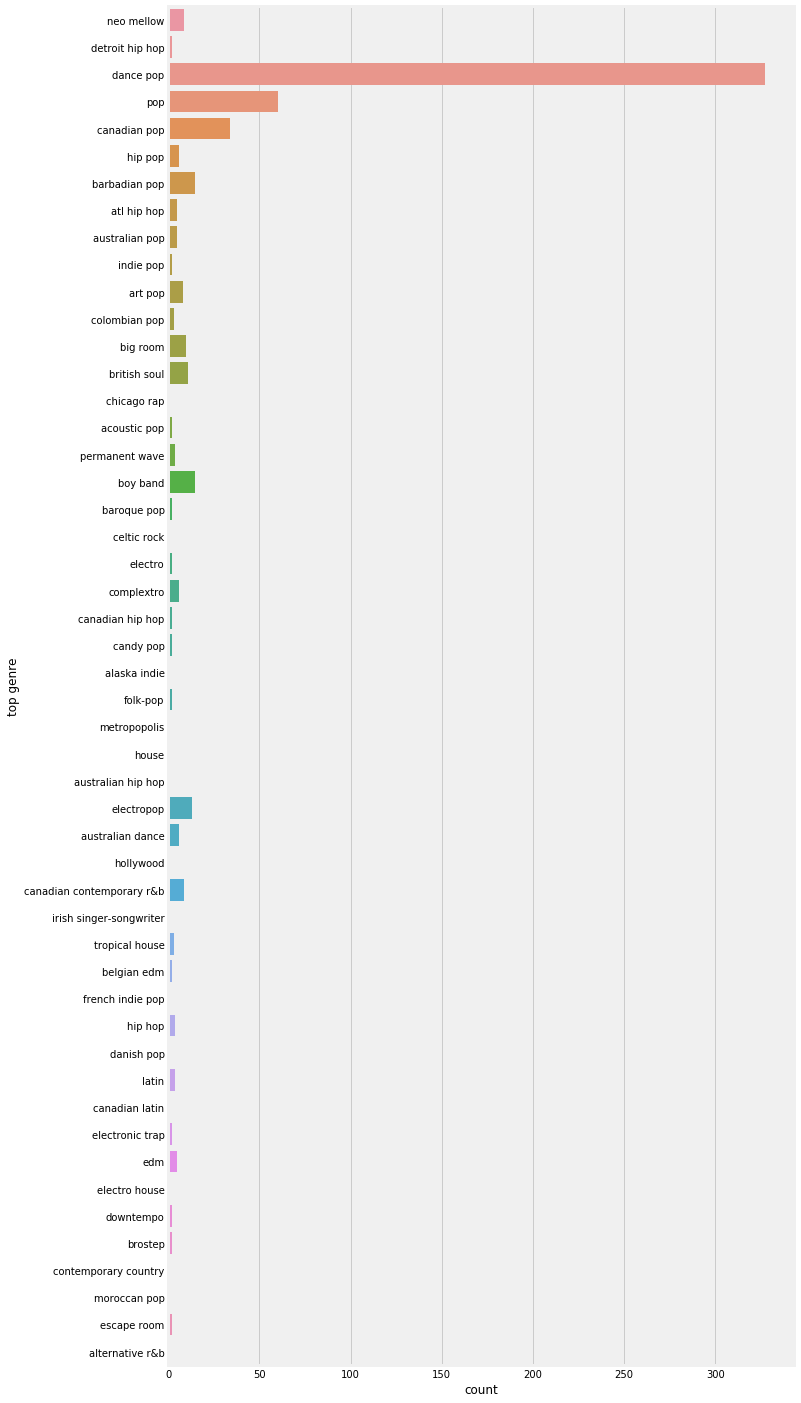

In [23]:
plt.figure(figsize=(10,25))
sns.countplot(y=spotify["top genre"])

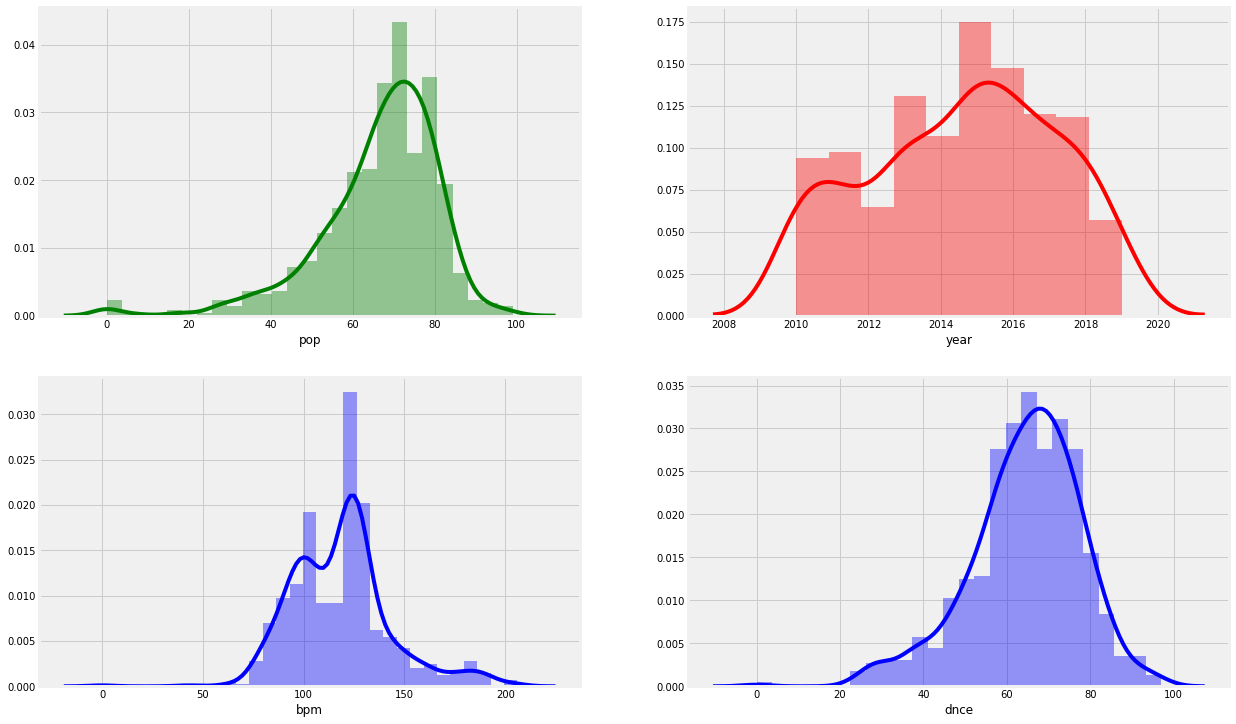

In [24]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.distplot(spotify["pop"],color="g")
fig.add_subplot(2,2,2)
sns.distplot(spotify["year"],color="r")
fig.add_subplot(2,2,3)
sns.distplot(spotify["bpm"],color="b")
fig.add_subplot(2,2,4)
sns.distplot(spotify["dnce"],color="b")

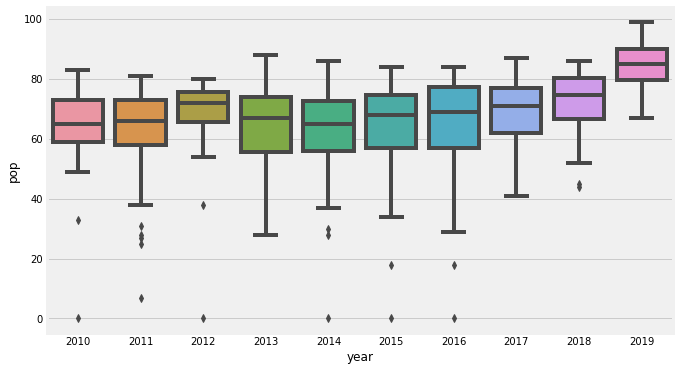

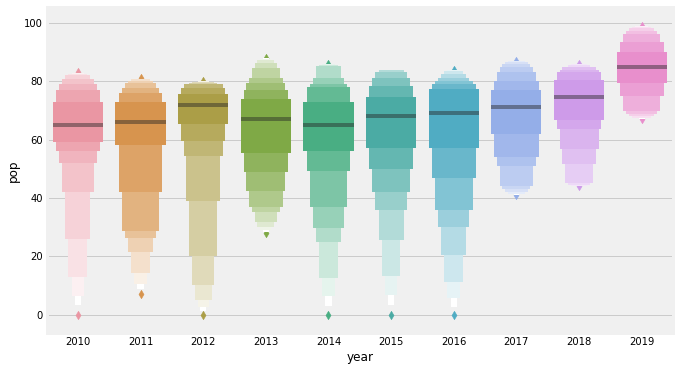

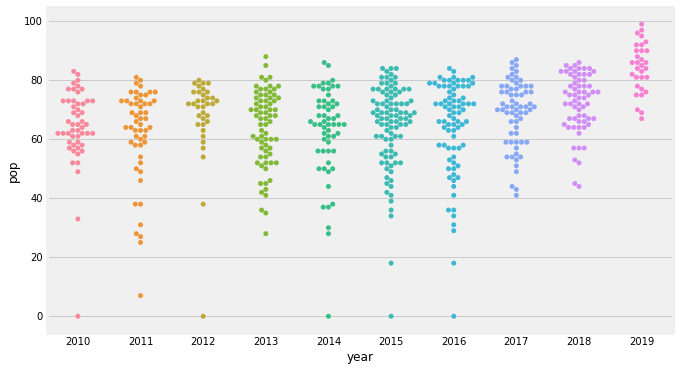

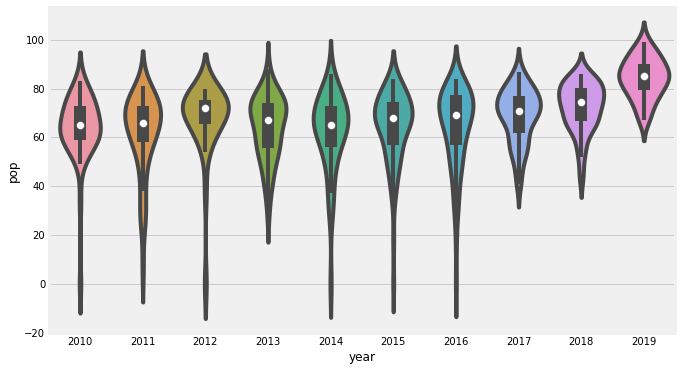

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year",y="pop",data=spotify)
plt.figure(figsize=(10,6))
sns.boxenplot(x="year",y="pop",data=spotify,scale="linear")
plt.figure(figsize=(10,6))
sns.swarmplot(x="year",y="pop",data=spotify)
plt.figure(figsize=(10,6))
sns.violinplot(x="year",y="pop",data=spotify)

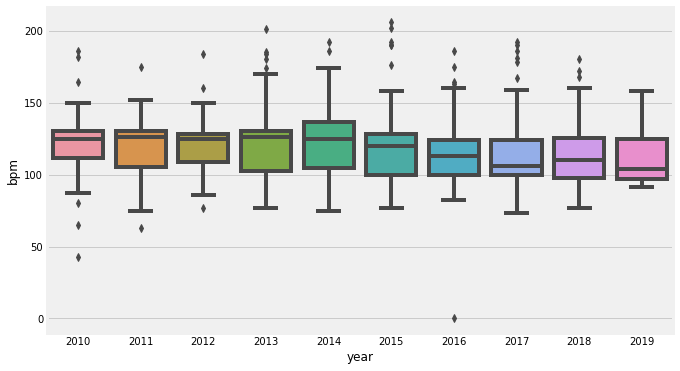

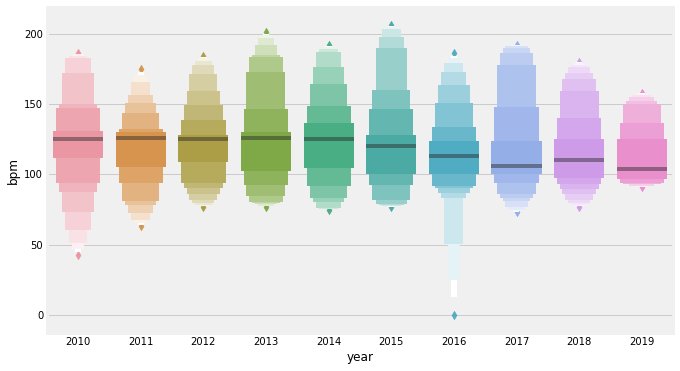

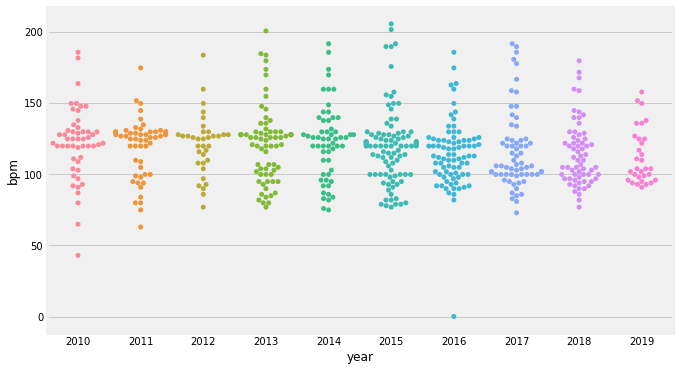

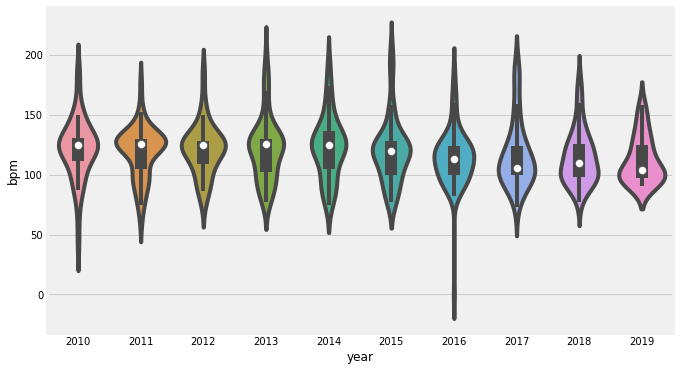

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year",y="bpm",data=spotify)
plt.figure(figsize=(10,6))
sns.boxenplot(x="year",y="bpm",data=spotify,scale="linear")
plt.figure(figsize=(10,6))
sns.swarmplot(x="year",y="bpm",data=spotify)
plt.figure(figsize=(10,6))
sns.violinplot(x="year",y="bpm",data=spotify)

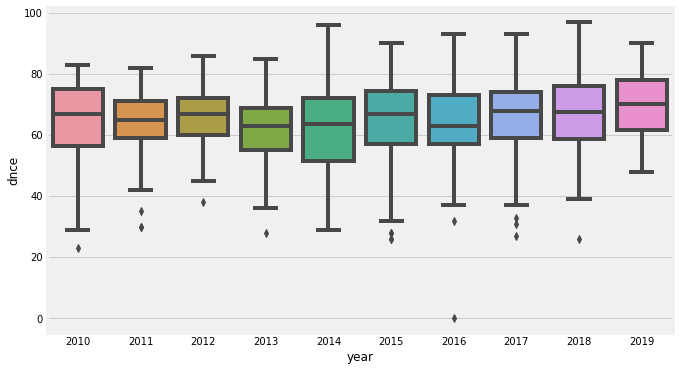

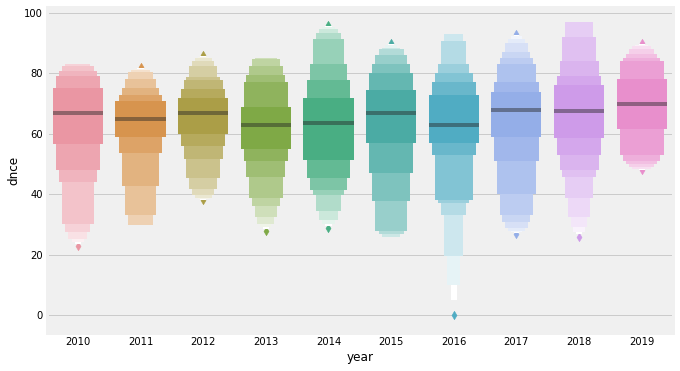

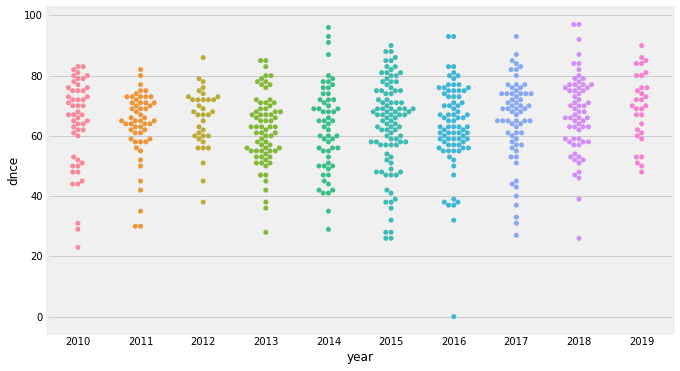

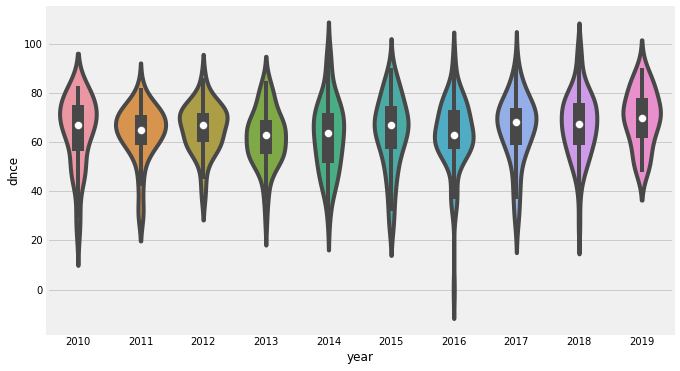

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year",y="dnce",data=spotify)
plt.figure(figsize=(10,6))
sns.boxenplot(x="year",y="dnce",data=spotify,scale="linear")
plt.figure(figsize=(10,6))
sns.swarmplot(x="year",y="dnce",data=spotify)
plt.figure(figsize=(10,6))
sns.violinplot(x="year",y="dnce",data=spotify)

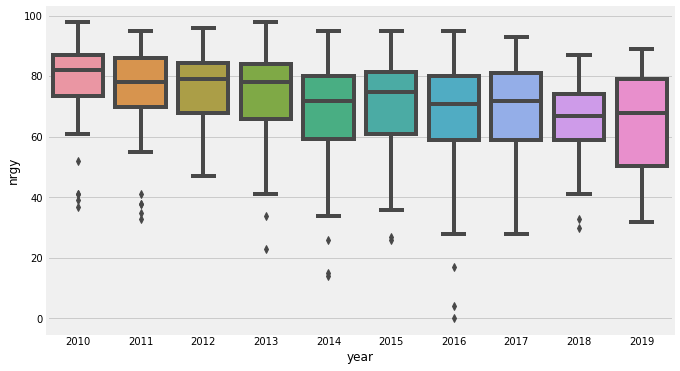

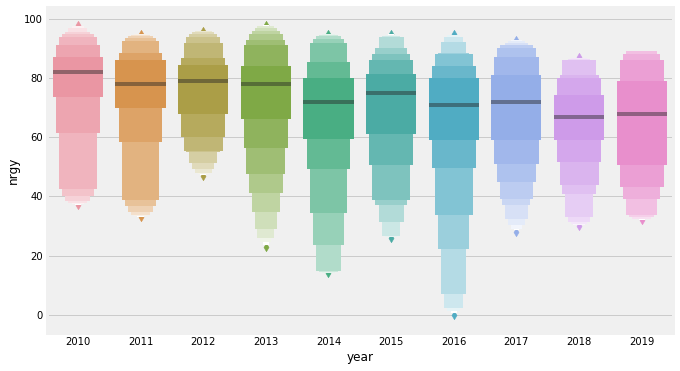

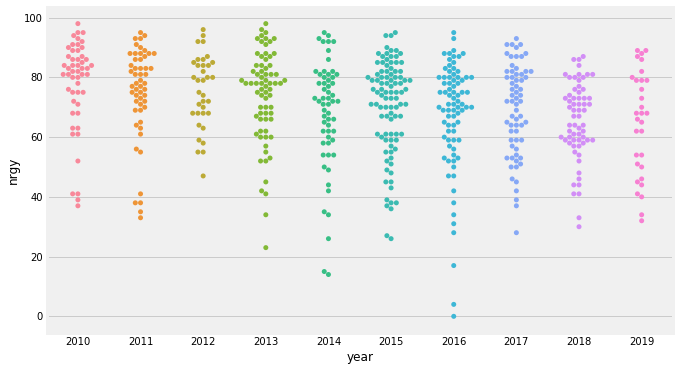

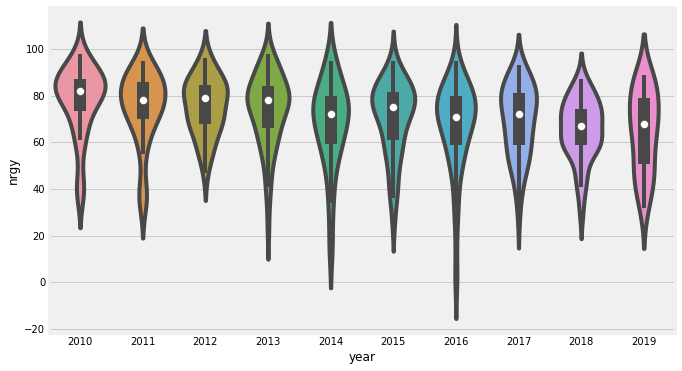

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year",y="nrgy",data=spotify)
plt.figure(figsize=(10,6))
sns.boxenplot(x="year",y="nrgy",data=spotify,scale="linear")
plt.figure(figsize=(10,6))
sns.swarmplot(x="year",y="nrgy",data=spotify)
plt.figure(figsize=(10,6))
sns.violinplot(x="year",y="nrgy",data=spotify)

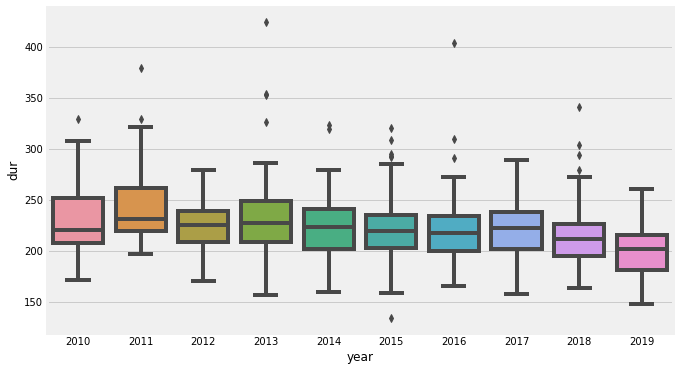

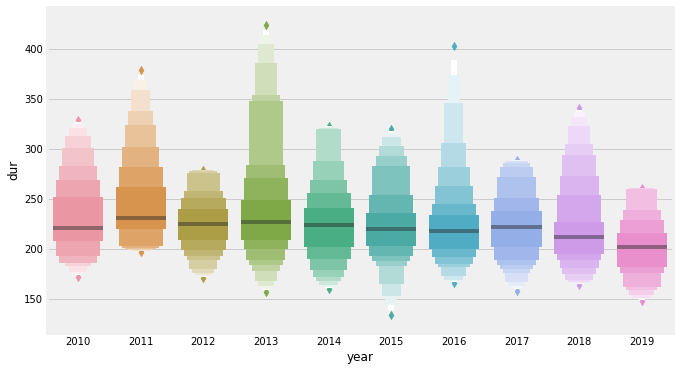

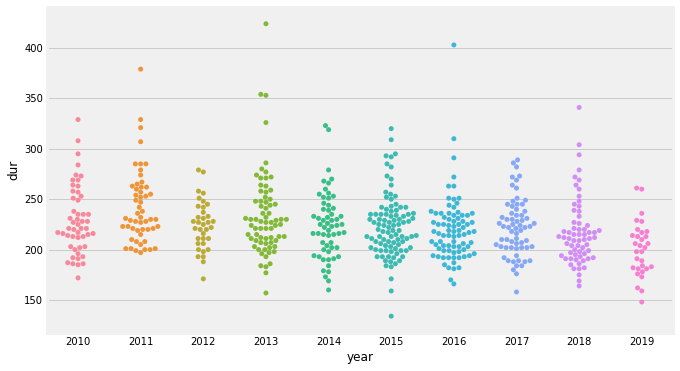

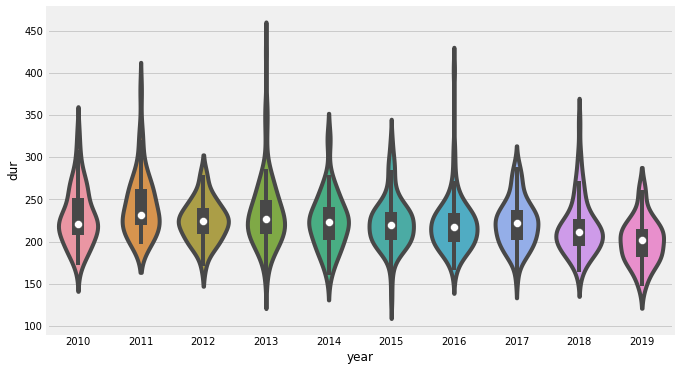

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year",y="dur",data=spotify)
plt.figure(figsize=(10,6))
sns.boxenplot(x="year",y="dur",data=spotify,scale="linear")
plt.figure(figsize=(10,6))
sns.swarmplot(x="year",y="dur",data=spotify)
plt.figure(figsize=(10,6))
sns.violinplot(x="year",y="dur",data=spotify)

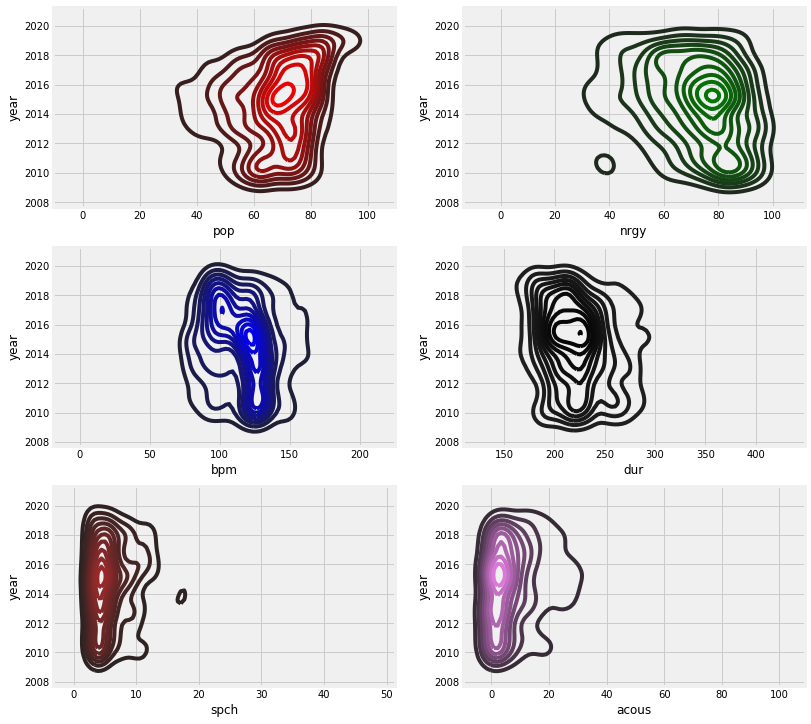

In [30]:
fig=plt.figure(figsize=(12,12.5))
fig.add_subplot(3,2,1)
sns.kdeplot(spotify["pop"],spotify["year"],color="r")
fig.add_subplot(3,2,2)
sns.kdeplot(spotify["nrgy"],spotify["year"],color="g")
fig.add_subplot(3,2,3)
sns.kdeplot(spotify["bpm"],spotify["year"],color="b")
fig.add_subplot(3,2,4)
sns.kdeplot(spotify["dur"],spotify["year"],color="black")
fig.add_subplot(3,2,5)
sns.kdeplot(spotify["spch"],spotify["year"],color="brown")
fig.add_subplot(3,2,6)
sns.kdeplot(spotify["acous"],spotify["year"],color="violet")

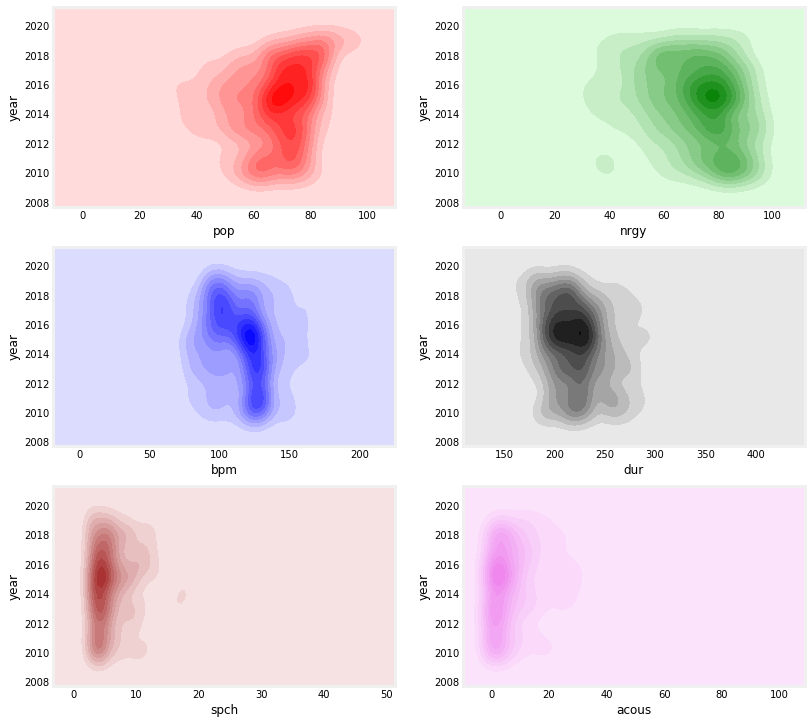

In [31]:
fig=plt.figure(figsize=(12,12.5))
fig.add_subplot(3,2,1)
sns.kdeplot(spotify["pop"],spotify["year"],color="r",shade=True)
fig.add_subplot(3,2,2)
sns.kdeplot(spotify["nrgy"],spotify["year"],color="g",shade=True)
fig.add_subplot(3,2,3)
sns.kdeplot(spotify["bpm"],spotify["year"],color="b",shade=True)
fig.add_subplot(3,2,4)
sns.kdeplot(spotify["dur"],spotify["year"],color="black",shade=True)
fig.add_subplot(3,2,5)
sns.kdeplot(spotify["spch"],spotify["year"],color="brown",shade=True)
fig.add_subplot(3,2,6)
sns.kdeplot(spotify["acous"],spotify["year"],color="violet",shade=True)

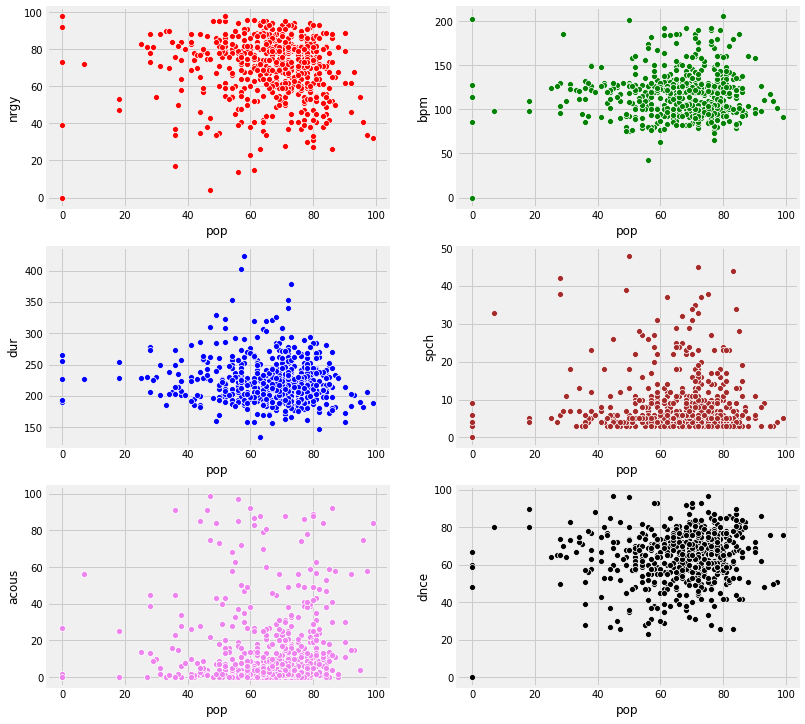

In [32]:
fig=plt.figure(figsize=(12,12.5))
fig.add_subplot(3,2,1)
sns.scatterplot(x="pop",y="nrgy",color="r",data=spotify)
fig.add_subplot(3,2,2)
sns.scatterplot(x="pop",y="bpm",color="g",data=spotify)
fig.add_subplot(3,2,3)
sns.scatterplot(x="pop",y="dur",color="b",data=spotify)
fig.add_subplot(3,2,4)
sns.scatterplot(x="pop",y="spch",color="brown",data=spotify)
fig.add_subplot(3,2,5)
sns.scatterplot(x="pop",y="acous",color="violet",data=spotify)
fig.add_subplot(3,2,6)
sns.scatterplot(x="pop",y="dnce",color="black",data=spotify)

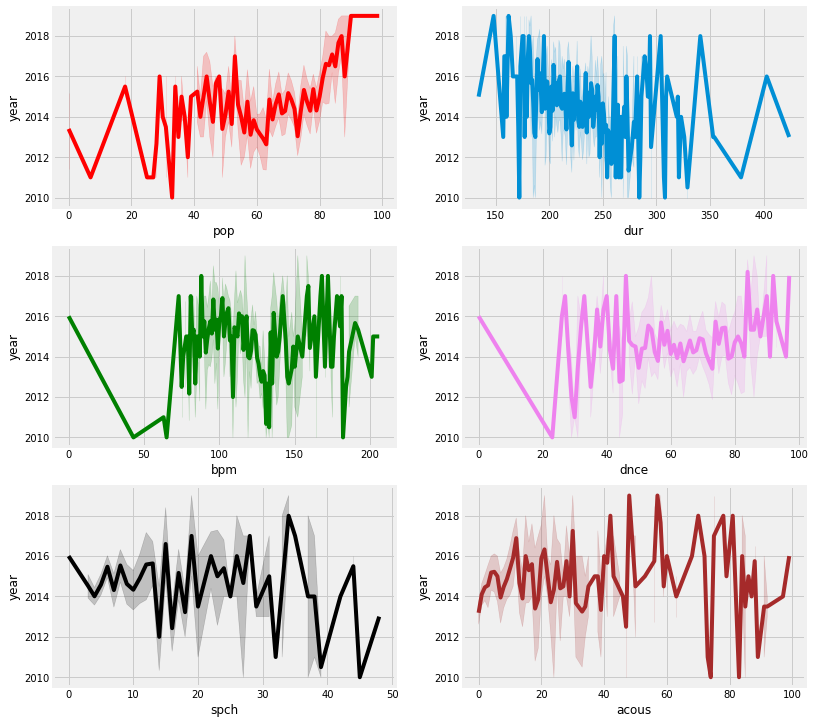

In [33]:
fig=plt.figure(figsize=(12,12.5))
fig.add_subplot(3,2,1)
sns.lineplot(x="pop",y="year",data=spotify,color="r")
fig.add_subplot(3,2,2)
sns.lineplot(x="dur",y="year",data=spotify)
fig.add_subplot(3,2,3)
sns.lineplot(x="bpm",y="year",data=spotify,color="g")
fig.add_subplot(3,2,4)
sns.lineplot(x="dnce",y="year",data=spotify,color="violet")
fig.add_subplot(3,2,5)
sns.lineplot(x="spch",y="year",data=spotify,color="black")
fig.add_subplot(3,2,6)
sns.lineplot(x="acous",y="year",data=spotify,color="brown")

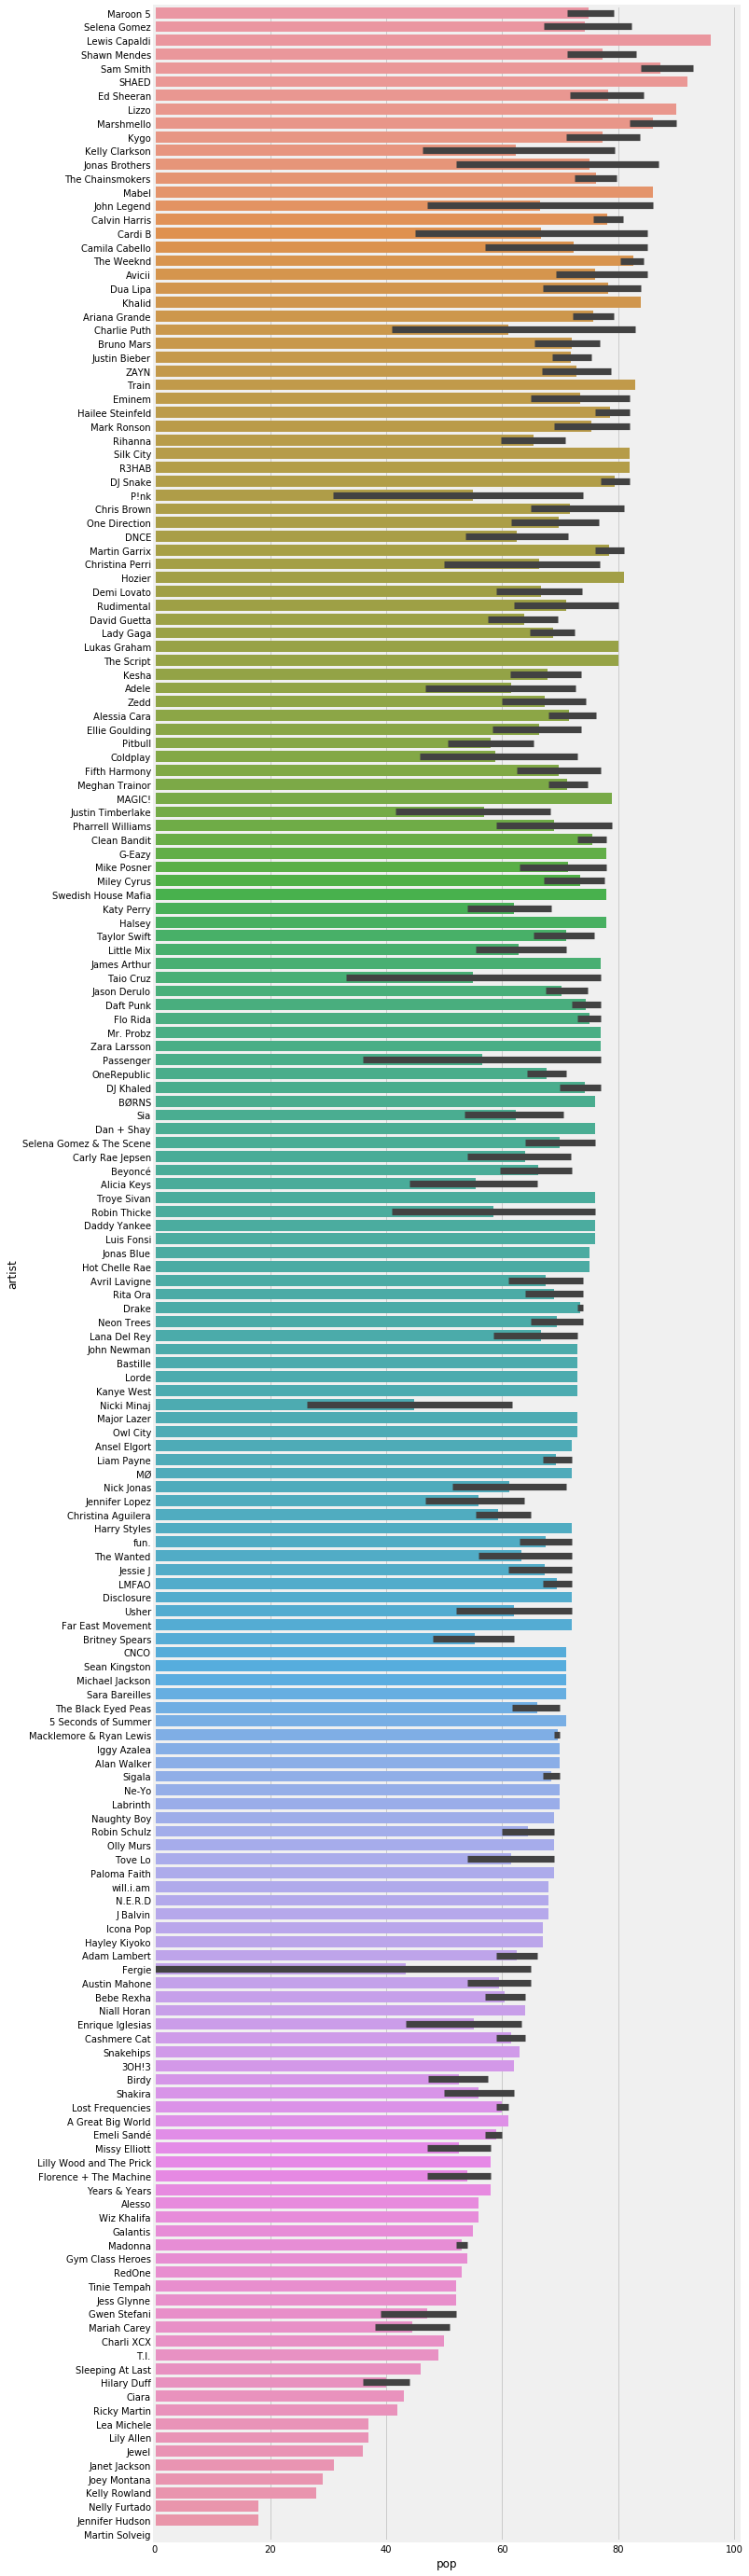

In [34]:
plt.figure(figsize=(10,50))
df=spotify.sort_values("pop",ascending=False)
sns.barplot(x="pop",y="artist",data=df)

In [35]:
fig=px.pie(spotify,names="artist",values="pop")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [36]:
fig=px.pie(spotify,names="top genre",values="pop")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [37]:
df=spotify[["dur","pop","bpm"]]
fig=go.Figure(data=go.Contour(z=df.values))
fig.show()

In [38]:
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title="Spotify",autosize=False,
           width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [39]:
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title="Spotify",autosize=False,
           width=500, height=500,
           scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
            margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [40]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [41]:
df=spotify.drop(["title"],axis=1)
encoder=LabelEncoder()
df["top genre"]=encoder.fit_transform(df["top genre"])
df["artist"]=encoder.fit_transform(df["artist"])
df["year"]=encoder.fit_transform(df["year"])
df.head()

artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0     174         46     0   97    89    67  -4     8   80  217     19     4   
1      49         27     0   87    93    75  -5    52   64  263     24    23   
2      89         25     0  120    84    76  -3    29   71  200     10    14   
3      94         25     0  119    92    70  -4     8   71  295      0     4   
4      19         48     0  109    84    64  -5     9   43  221      2     4   

   pop  
0   83  
1   82  
2   80  
3   79  
4   78

In [42]:
x=df.drop(["top genre","dB"],axis=1)
y=df["top genre"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.05)

In [44]:
nb=MultinomialNB()
knn=KNeighborsClassifier(n_neighbors=37)
lg=LogisticRegression()
dc=DecisionTreeClassifier()
rnf=RandomForestClassifier()
sv=SVC(C=10, degree=1,gamma= 0.1,kernel='rbf')

voting_clf=VotingClassifier(estimators=[('lr',lg),
                                        ('rf',rnf),
                                        ('dt',dc),
                                        ('kn',knn),
                                        ('nby',nb),
                                        ('svm',sv)],voting='hard')
voting_clf.fit(x_train,y_train)
y_pred_v=voting_clf.predict(x_test)
print("voting classifier")
print(accuracy_score(y_test,y_pred_v))

voting classifier
0.6774193548387096


In [45]:
for clf in (nb,knn,lg,dc,rnf,sv):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

MultinomialNB 0.22580645161290322
KNeighborsClassifier 0.6129032258064516
LogisticRegression 0.5806451612903226
DecisionTreeClassifier 0.7096774193548387
RandomForestClassifier 0.7741935483870968
SVC 0.6774193548387096


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score,mean_squared_error,mean_absolute_error

In [48]:
lr=LinearRegression()
dcr=DecisionTreeRegressor()
rnr=RandomForestRegressor()
sv=SVR(C=1, degree=1,epsilon= 0.1,kernel='rbf')

voting_reg=VotingRegressor(estimators=[('lr',lr),
                                        ('rn',rnr),
                                        ('dc',dcr),
                                        ('svr',sv)])

x=df.drop(["pop","artist","top genre"],axis=1)
y=df["pop"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.1)
voting_reg.fit(x_train,y_train)
y_pred=voting_reg.predict(x_test)
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

mean_squared_error  mean_squared_root_error  mean_absolute_error  \
0          132.828843                 11.52514             8.853058   

   explained_variance_score  
0                  0.151289